In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.manifold import TSNE
import tensorflow as tf

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Stratified subset for training if compute is limited
X_train, _, y_train, _ = train_test_split(X, y, train_size=20000, stratify=y, random_state=42)

# Test set remains the same
X_test, y_test = mnist["data"], mnist["target"].astype(np.uint8)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
# Define MLP architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])



In [35]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])



In [36]:
# Train the MLP
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
563/563 [==============================] - 3s 3ms/step - loss: 2.6499 - accuracy: 0.3372 - val_loss: 1.6395 - val_accuracy: 0.4930
Epoch 2/20
563/563 [==============================] - 2s 3ms/step - loss: 1.3348 - accuracy: 0.5489 - val_loss: 1.2573 - val_accuracy: 0.6085
Epoch 3/20
563/563 [==============================] - 2s 3ms/step - loss: 1.0575 - accuracy: 0.6448 - val_loss: 1.0209 - val_accuracy: 0.6720
Epoch 4/20
563/563 [==============================] - 2s 3ms/step - loss: 0.8886 - accuracy: 0.6919 - val_loss: 0.9464 - val_accuracy: 0.6795
Epoch 5/20
563/563 [==============================] - 2s 4ms/step - loss: 0.8014 - accuracy: 0.7147 - val_loss: 0.8414 - val_accuracy: 0.7395
Epoch 6/20
563/563 [==============================] - 2s 4ms/step - loss: 0.7066 - accuracy: 0.7649 - val_loss: 0.7499 - val_accuracy: 0.7755
Epoch 7/20
563/563 [==============================] - 2s 3ms/step - loss: 0.5984 - accuracy: 0.8270 - val_loss: 0.5813 - val_accuracy: 0.8445
Epoch 

In [37]:
# Evaluate the MLP
mlp_pred = np.argmax(model.predict(X_test), axis=1)
mlp_f1 = f1_score(y_test, mlp_pred, average='macro')
mlp_cm = confusion_matrix(y_test, mlp_pred)

# Compare against RF and LR models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred, average='macro')
rf_cm = confusion_matrix(y_test, rf_pred)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_f1 = f1_score(y_test, lr_pred, average='macro')
lr_cm = confusion_matrix(y_test, lr_pred)


2188/2188 [==============================] - 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


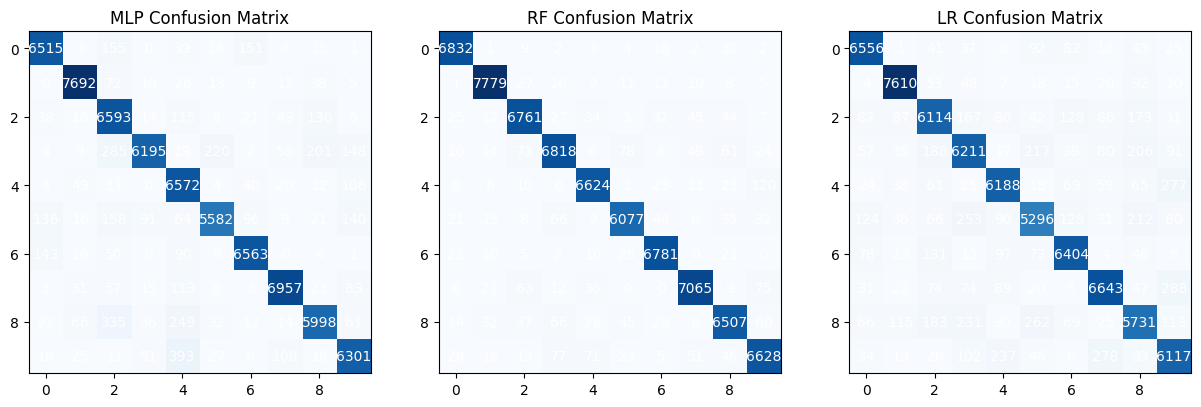

In [38]:
# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mlp_cm, cmap='Blues', interpolation='nearest')
axes[0].set_title('MLP Confusion Matrix')
for i in range(10):
    for j in range(10):
        axes[0].text(j, i, mlp_cm[i, j], ha='center', va='center', color='white')
axes[1].imshow(rf_cm, cmap='Blues', interpolation='nearest')
axes[1].set_title('RF Confusion Matrix')
for i in range(10):
    for j in range(10):
        axes[1].text(j, i, rf_cm[i, j], ha='center', va='center', color='white')
axes[2].imshow(lr_cm, cmap='Blues', interpolation='nearest')
axes[2].set_title('LR Confusion Matrix')
for i in range(10):
    for j in range(10):
        axes[2].text(j, i, lr_cm[i, j], ha='center', va='center', color='white')
plt.show()

In [39]:
print("MLP F1-score:", mlp_f1)
print("RF F1-score:", rf_f1)
print("LR F1-score:", lr_f1)

MLP F1-score: 0.9273393954087223
RF F1-score: 0.9693553574689959
LR F1-score: 0.896714871527101


In [40]:
most_confused_pairs_mlp = []
for i in range(10):  # Assuming 10 classes
    col = mlp_cm[:, i]  # Get the ith column
    max_value = max(col)
    max_index = np.where(col == max_value)[0][0]  # Index of maximum value
    frequent_elements = np.where(col > 150)[0]
    pairs = [(max_index, elem) for elem in frequent_elements if max_index != elem]  # Filter out pairs where both elements are equal
    most_confused_pairs_mlp.extend(pairs)


for pair in most_confused_pairs_mlp:
    print("Most confused pair in MLP:", pair)

most_confused_pairs_rf = []
for i in range(10):  # Assuming 10 classes
    col = rf_cm[:, i]  # Get the ith column
    max_value = max(col)
    max_index = np.where(col == max_value)[0][0]  # Index of maximum value
    frequent_elements = np.where(col > 150)[0]
    pairs = [(max_index, elem) for elem in frequent_elements if max_index != elem]  # Filter out pairs where both elements are equal
    most_confused_pairs_rf.extend(pairs)


for pair in most_confused_pairs_rf:
    print("Most confused pair in RF:", pair)

most_confused_pairs_lr = []
for i in range(10):  # Assuming 10 classes
    col = lr_cm[:, i]  # Get the ith column
    max_value = max(col)
    max_index = np.where(col == max_value)[0][0]  # Index of maximum value
    frequent_elements = np.where(col > 150)[0]
    pairs = [(max_index, elem) for elem in frequent_elements if max_index != elem]  # Filter out pairs where both elements are equal
    most_confused_pairs_lr.extend(pairs)


for pair in most_confused_pairs_lr:
    print("Most confused pair in LR:", pair)


Most confused pair in MLP: (2, 0)
Most confused pair in MLP: (2, 3)
Most confused pair in MLP: (2, 5)
Most confused pair in MLP: (2, 8)
Most confused pair in MLP: (4, 8)
Most confused pair in MLP: (4, 9)
Most confused pair in MLP: (5, 3)
Most confused pair in MLP: (6, 0)
Most confused pair in MLP: (8, 3)
Most confused pair in LR: (2, 3)
Most confused pair in LR: (2, 8)
Most confused pair in LR: (3, 2)
Most confused pair in LR: (3, 5)
Most confused pair in LR: (3, 8)
Most confused pair in LR: (4, 9)
Most confused pair in LR: (5, 3)
Most confused pair in LR: (5, 8)
Most confused pair in LR: (7, 9)
Most confused pair in LR: (8, 2)
Most confused pair in LR: (8, 3)
Most confused pair in LR: (8, 5)
Most confused pair in LR: (9, 4)
Most confused pair in LR: (9, 7)


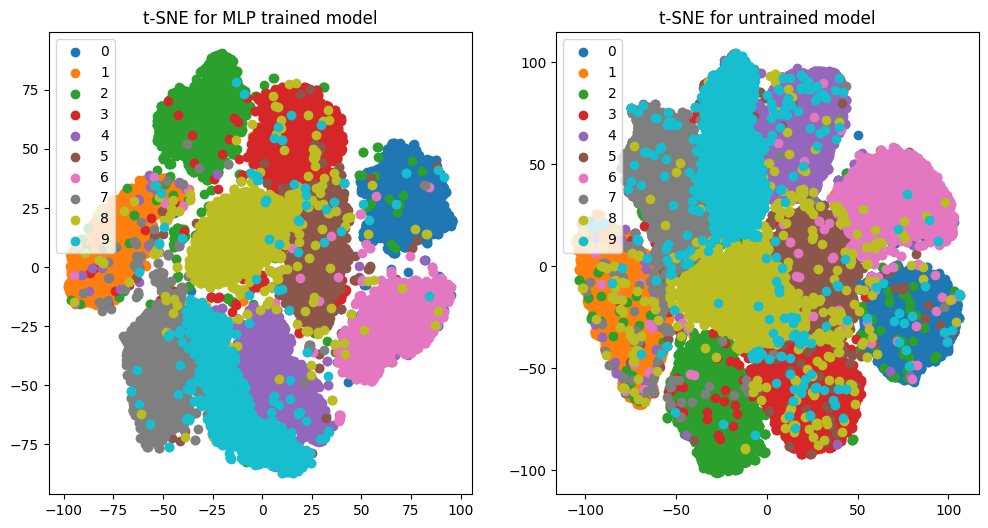

In [41]:
# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(121)
for i in range(10):
    plt.scatter(X_train_tsne[y_train == i, 0], X_train_tsne[y_train == i, 1], label=str(i))
plt.title('t-SNE for MLP trained model')
plt.legend()

plt.subplot(122)
for i in range(10):
    plt.scatter(X_test_tsne[y_test == i, 0], X_test_tsne[y_test == i, 1], label=str(i))
plt.title('t-SNE for untrained model')
plt.legend()
plt.show()

In [44]:
# Apply MLP on Fashion-MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X_fashion1 = fashion_mnist["data"]
y_fashion1 = fashion_mnist["target"].astype(np.uint8)

X_fashion, _, y_fashion, _ = train_test_split(X_fashion1, y_fashion1, train_size=10000, stratify=y, random_state=42)

# Predict on Fashion-MNIST
fashion_pred = np.argmax(model.predict(X_fashion), axis=1)
fashion_f1 = f1_score(y_fashion, fashion_pred, average='macro')

print("F1-score on Fashion-MNIST using MLP:", fashion_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


313/313 [==============================] - 1s 2ms/step
F1-score on Fashion-MNIST using MLP: 0.04698873897954757


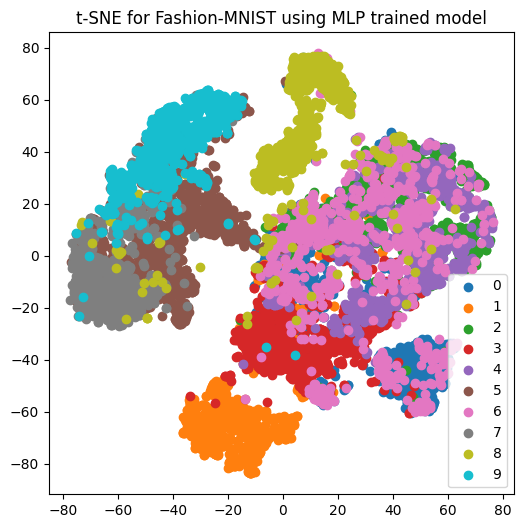

In [45]:
# Visualize t-SNE for Fashion-MNIST
X_fashion_tsne = tsne.fit_transform(X_fashion)

plt.figure(figsize=(6, 6))
for i in range(10):
    plt.scatter(X_fashion_tsne[y_fashion == i, 0], X_fashion_tsne[y_fashion == i, 1], label=str(i))
plt.title('t-SNE for Fashion-MNIST using MLP trained model')
plt.legend()
plt.show()